# Airbnb Rio de Janeiro
## listings

dataset: http://insideairbnb.com/get-the-data.html

In [1]:
import pandas as pd
import json

from keplergl import KeplerGl 

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import math
import numpy as np
import matplotlib.pyplot as plt
 

%matplotlib inline

In [3]:
df_listings = pd.read_csv("data/listings.csv", low_memory=False)
print("Data Shape:", df_listings.shape)
df_listings.head()

Data Shape: (35793, 106)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200524171540,2020-05-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,...,t,f,moderate,f,f,1,1,0,0,2.09
1,21280,https://www.airbnb.com/rooms/21280,20200524171540,2020-05-25,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200524171540,2020-05-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,1.96
3,31560,https://www.airbnb.com/rooms/31560,20200524171540,2020-05-25,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.35
4,35636,https://www.airbnb.com/rooms/35636,20200524171540,2020-05-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.25


# EDA
## Checando colunas e seus tipos

In [4]:
for idx, dtype in zip(df_listings.dtypes.index, df_listings.dtypes):
    print("name:", idx)
    print("type:", dtype)

name: id
type: int64
name: listing_url
type: object
name: scrape_id
type: int64
name: last_scraped
type: object
name: name
type: object
name: summary
type: object
name: space
type: object
name: description
type: object
name: experiences_offered
type: object
name: neighborhood_overview
type: object
name: notes
type: object
name: transit
type: object
name: access
type: object
name: interaction
type: object
name: house_rules
type: object
name: thumbnail_url
type: float64
name: medium_url
type: float64
name: picture_url
type: object
name: xl_picture_url
type: float64
name: host_id
type: int64
name: host_url
type: object
name: host_name
type: object
name: host_since
type: object
name: host_location
type: object
name: host_about
type: object
name: host_response_time
type: object
name: host_response_rate
type: object
name: host_acceptance_rate
type: object
name: host_is_superhost
type: object
name: host_thumbnail_url
type: object
name: host_picture_url
type: object
name: host_neighbourhood
ty

In [5]:
df_listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,35793.0,2.129684e+07,1.368508e+07,1.787800e+04,1.098687e+07,1.704652e+07,3.428384e+07,4.352478e+07
scrape_id,35793.0,2.020052e+13,1.023452e+01,2.020052e+13,2.020052e+13,2.020052e+13,2.020052e+13,2.020052e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,35793.0,8.492397e+07,8.916201e+07,1.173900e+04,1.508375e+07,5.640055e+07,1.118898e+08,3.468845e+08
host_listings_count,35788.0,1.868129e+01,1.322389e+02,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.379000e+03
host_total_listings_count,35788.0,1.868129e+01,1.322389e+02,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.379000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,35793.0,-2.296522e+01,3.488945e-02,-2.307340e+01,-2.298456e+01,-2.297066e+01,-2.294693e+01,-2.275038e+01


## Feature selection - selecionando algumas colunas mais relevantes arbitrariamente antes de continuar

In [6]:
df_listings = df_listings[['host_listings_count','host_response_rate', 'host_acceptance_rate', 'host_identity_verified', 'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'cleaning_fee', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]


In [7]:
df_listings.isna().sum()

host_listings_count           5
host_response_rate        19310
host_acceptance_rate      12643
host_identity_verified        5
neighbourhood_cleansed        0
zipcode                    1744
latitude                      0
longitude                     0
property_type                 0
accommodates                  0
bathrooms                    67
bedrooms                     73
beds                        329
square_feet               35329
price                         0
cleaning_fee              11520
guests_included               0
minimum_nights                0
number_of_reviews             0
review_scores_rating      15791
reviews_per_month         14906
dtype: int64

Removendo colunas que não 'valem a pena'

In [8]:
df_listings.drop(columns=['host_response_rate','host_acceptance_rate','square_feet','review_scores_rating','reviews_per_month'], inplace=True)

Abrindo mão de 1749 registros para podermos testar o uso do CEP

In [9]:
df_listings.dropna(subset=['zipcode','host_identity_verified','host_listings_count'], inplace=True)

In [10]:
df_listings.isna().sum()

host_listings_count           0
host_identity_verified        0
neighbourhood_cleansed        0
zipcode                       0
latitude                      0
longitude                     0
property_type                 0
accommodates                  0
bathrooms                    63
bedrooms                     68
beds                        313
price                         0
cleaning_fee              10809
guests_included               0
minimum_nights                0
number_of_reviews             0
dtype: int64

## preprocessa para visualização no mapa interativo

In [11]:
df_listings['price'] = df_listings.price.str.replace('$','')
df_listings['price'] = df_listings.price.str.replace(',','')
df_listings.price = pd.to_numeric(df_listings.price)


df_listings['cleaning_fee'] = df_listings.cleaning_fee.str.replace('$','')
df_listings['cleaning_fee'] = df_listings.cleaning_fee.str.replace(',','')
df_listings.cleaning_fee = pd.to_numeric(df_listings.cleaning_fee)


df_listings.cleaning_fee = df_listings.cleaning_fee.fillna(0)
#df_listings.cleaning_fee = df_listings.cleaning_fee.fillna(df_listings.cleaning_fee.median())

In [12]:
df_listings.describe()

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,number_of_reviews
count,34044.000000,34044.000000,34044.000000,34044.000000,33981.000000,33976.000000,33731.000000,34044.000000,34044.000000,34044.000000,34044.000000,34044.000000
mean,19.292915,-22.965311,-43.252010,4.186670,1.669948,1.622557,2.543032,797.505728,113.079015,1.743097,4.804518,9.889467
std,134.722293,0.034608,0.096543,2.627903,1.041778,1.085454,2.079550,2476.174253,181.273934,1.612901,22.095723,26.000473
min,0.000000,-23.073400,-43.737090,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,-22.984530,-43.320130,2.000000,1.000000,1.000000,1.000000,159.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,-22.970730,-43.198645,4.000000,1.000000,1.000000,2.000000,299.000000,100.000000,1.000000,2.000000,1.000000
75%,3.000000,-22.947508,-43.186600,5.000000,2.000000,2.000000,3.000000,649.000000,160.000000,2.000000,4.000000,6.000000
max,1379.000000,-22.750380,-43.104620,160.000000,20.000000,30.000000,62.000000,138288.000000,7743.000000,36.000000,1123.000000,401.000000


## Visualiza distribuição espacial

In [13]:
with open('mapconfig.json') as json_file:
    map_config = json.load(json_file)

In [14]:
map_1 = KeplerGl(height=500, config=map_config)
map_1.add_data(data=df_listings, name="data_1")

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


## Valor por região

Cor dos hexágonos = valor médio da diária na região

In [15]:
map_1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '6cu8gy', 'type': '…

## Checa distribuição por vizinhanças

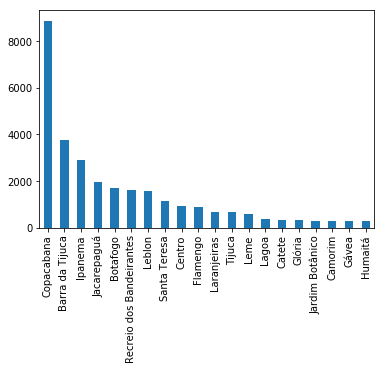

In [16]:
df_listings.neighbourhood_cleansed.value_counts()[:20].plot.bar();

## Checa distribuição por tamanho e preço

In [17]:
df_listings.shape

(34044, 16)

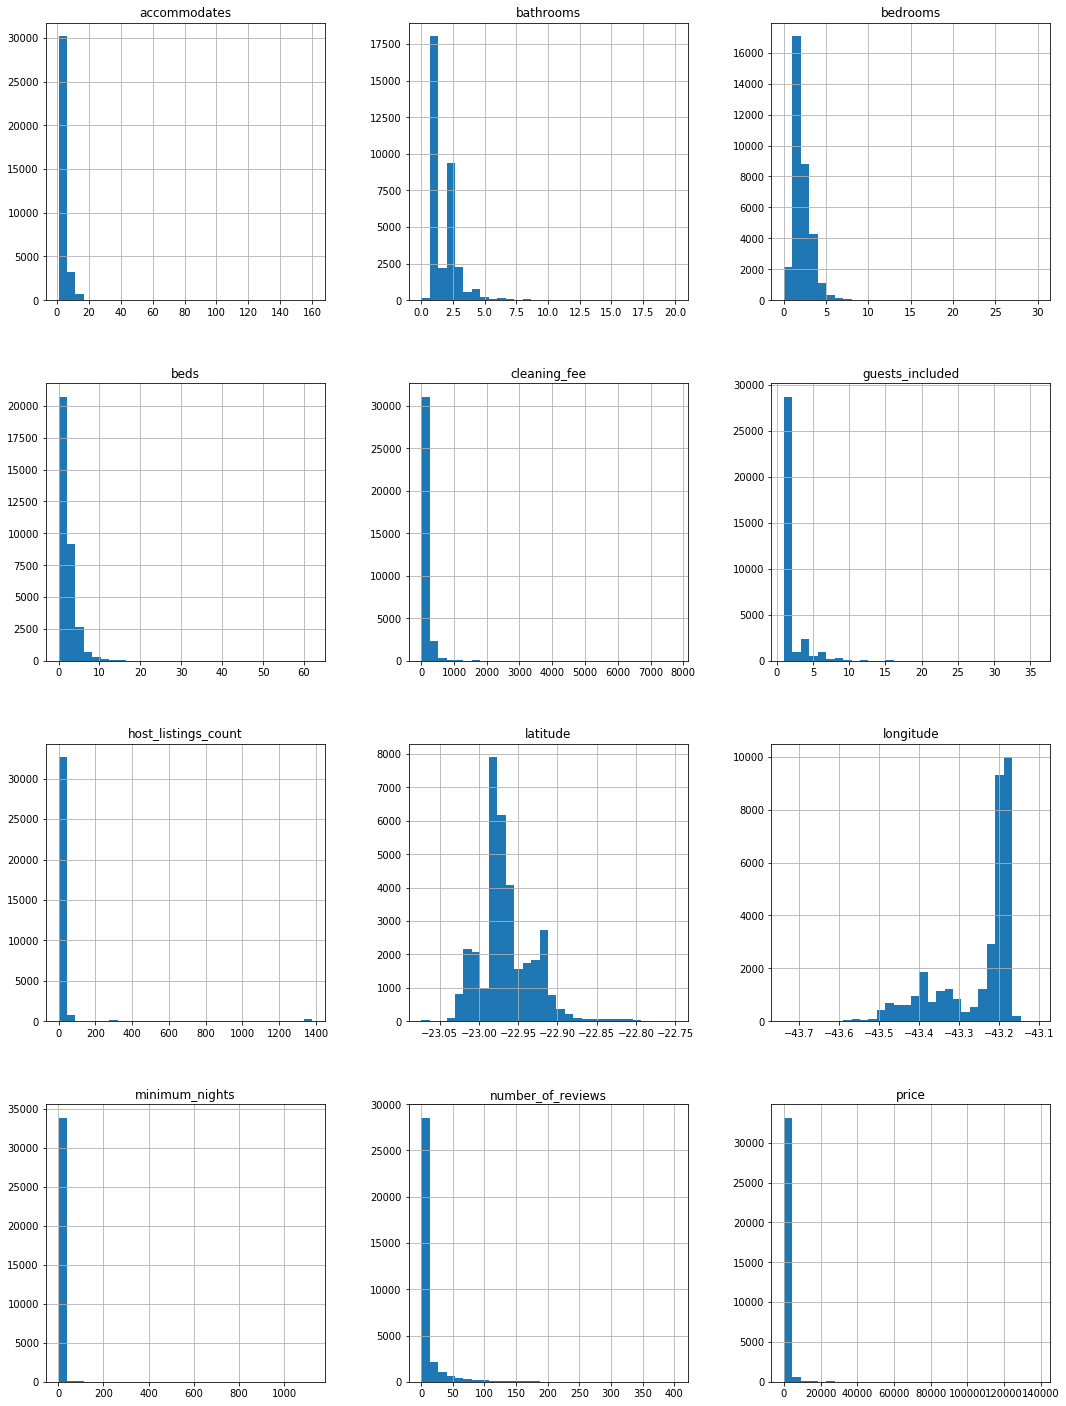

In [18]:
df_listings.hist(bins=30,figsize=(18,25));

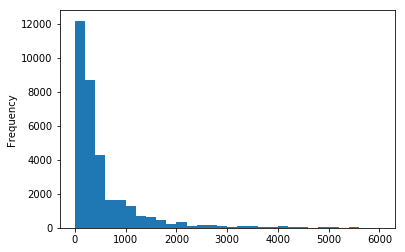

In [19]:
df_listings[df_listings.price < 6000].price.plot.hist(bins=30);

- Distribuição das features numéricas é exponencial
- Alguns outliers 'impactando' no comportamento do dataset

## Pré-processa / filtra outliers / imputation

### Filtrando datapoints até o terceiro quartil + uma quantidade arbitrária

In [20]:
df_listings = df_listings[df_listings.accommodates < 20]
df_listings.shape

(34038, 16)

In [21]:
df_listings = df_listings[df_listings.bathrooms < 10]
df_listings.shape

(33958, 16)

In [22]:
df_listings = df_listings[df_listings.bedrooms < 10]
df_listings.shape

(33882, 16)

In [23]:
df_listings = df_listings[df_listings.beds < 10]
df_listings.shape

(33266, 16)

In [24]:
df_listings = df_listings[df_listings.guests_included < 10]
df_listings.shape

(33096, 16)

In [25]:
df_listings = df_listings[df_listings.minimum_nights <= 60]
df_listings.shape

(32944, 16)

In [26]:
df_listings = df_listings[df_listings.price <= 2000]
df_listings.shape

(30823, 16)

In [27]:
df_listings = df_listings[df_listings.cleaning_fee <= 1000]
df_listings.shape

(30770, 16)

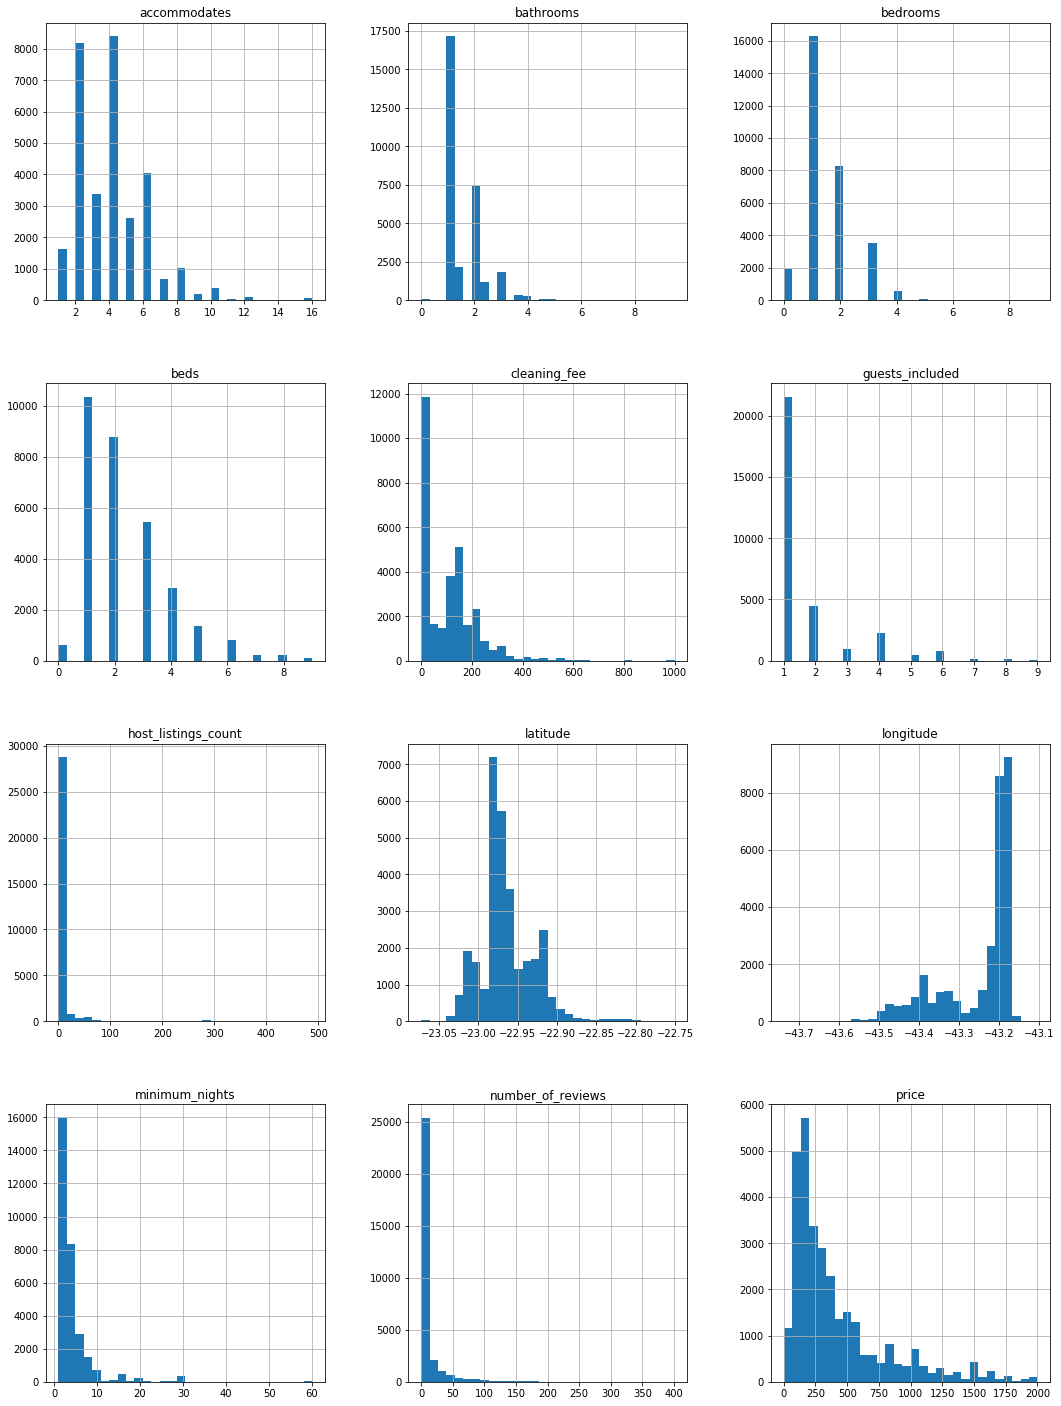

In [28]:
df_listings.hist(bins=30,figsize=(18,25));

Muito melhor!

### Transforma zipcode em feature numérica para avaliação 

In [29]:
df_listings['zipcode'] = df_listings['zipcode'].str.replace(r"[a-zA-Z]",'')
df_listings['zipcode'] = df_listings['zipcode'].str.replace('•','')
df_listings['zipcode'] = df_listings['zipcode'].str.replace('-','')
df_listings['zipcode'] = df_listings['zipcode'].str.replace(',','')
df_listings['zipcode'] = df_listings['zipcode'].str.replace(' ','')
df_listings['zipcode'] = df_listings['zipcode'].str.replace('\n','')
df_listings['zipcode'] = df_listings['zipcode'].str.replace('.','')
df_listings['zipcode'] = df_listings['zipcode'].str.replace('/','')
df_listings['zipcode'] = df_listings['zipcode'].str.replace('_','')

df_listings['zipcode'] = pd.to_numeric(df_listings['zipcode'])

In [30]:
df_listings.dropna(subset=['zipcode'], inplace=True)
df_listings.isna().sum()

host_listings_count       0
host_identity_verified    0
neighbourhood_cleansed    0
zipcode                   0
latitude                  0
longitude                 0
property_type             0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
cleaning_fee              0
guests_included           0
minimum_nights            0
number_of_reviews         0
dtype: int64

### Filtrando datapoints somente dos bairros com mais de 100 listings

In [31]:
value_counts = df_listings.neighbourhood_cleansed.value_counts() > 100
top_neighborhoods = value_counts[value_counts.values].index.values
top_neighborhoods

array(['Copacabana', 'Barra da Tijuca', 'Ipanema', 'Jacarepaguá',
       'Botafogo', 'Recreio dos Bandeirantes', 'Leblon', 'Santa Teresa',
       'Centro', 'Flamengo', 'Laranjeiras', 'Tijuca', 'Leme', 'Lagoa',
       'Glória', 'Catete', 'Humaitá', 'Camorim', 'Jardim Botânico',
       'Gávea', 'Maracanã', 'Vila Isabel', 'Freguesia (Jacarepaguá)',
       'Taquara', 'São Conrado', 'Vargem Pequena', 'Vidigal', 'Urca',
       'Itanhangá', 'Cosme Velho', 'Rio Comprido'], dtype=object)

In [32]:
df_listings = df_listings[df_listings.neighbourhood_cleansed.isin(top_neighborhoods)]
df_listings.shape

(28567, 16)

### Filtrando datapoints dos tipos de propriedade com mais de 50 listings

In [33]:
value_counts = df_listings.property_type.value_counts() > 50
top_property_types = value_counts[value_counts.values].index.values
top_property_types

array(['Apartment', 'House', 'Condominium', 'Loft', 'Serviced apartment',
       'Guest suite', 'Bed and breakfast', 'Guesthouse', 'Hotel', 'Villa',
       'Hostel', 'Other'], dtype=object)

In [34]:
df_listings = df_listings[df_listings.property_type.isin(top_property_types)]
df_listings.shape

(28375, 16)

### Faz one hot com alguns campos

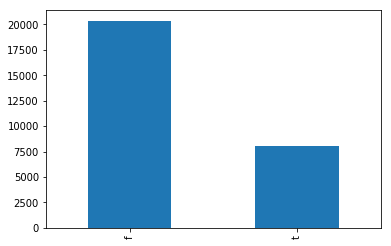

In [35]:
df_listings.host_identity_verified.value_counts().plot.bar();

In [36]:
## pequeno hack para podermos continuar os testes antes dos one_hots
df_listings2 = df_listings.copy()

In [37]:
one_hot = pd.get_dummies(df_listings['host_identity_verified'], prefix="host_identity_verified")
df_listings = df_listings.join(one_hot)

df_listings = df_listings.drop(['host_identity_verified'], axis=1)

print(df_listings.shape)
df_listings.head()

(28375, 17)


,host_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,number_of_reviews,host_identity_verified_f,host_identity_verified_t
0,2.0,Copacabana,22020050.0,-22.96592,-43.17896,Condominium,5,1.0,2.0,2.0,188.0,250.0,2,7,251,0,1
1,0.0,Ipanema,22420010.0,-22.98467,-43.19611,Apartment,6,2.0,2.0,4.0,442.0,277.0,6,5,94,0,1
2,3.0,Copacabana,22060020.0,-22.97712,-43.19045,Apartment,2,1.0,1.0,2.0,160.0,250.0,2,7,238,0,1
3,1.0,Ipanema,22410003.0,-22.98302,-43.21427,Apartment,3,1.0,1.0,1.0,359.0,111.0,2,2,282,0,1
4,1.0,Ipanema,22081020.0,-22.98816,-43.19359,Apartment,2,1.5,1.0,1.0,495.0,225.0,2,2,181,0,1


In [38]:
one_hot = pd.get_dummies(df_listings['neighbourhood_cleansed'], prefix="neighbourhood")
df_listings = df_listings.join(one_hot)

df_listings = df_listings.drop(['neighbourhood_cleansed'], axis=1)

print(df_listings.shape)
df_listings.head()

(28375, 47)


,host_listings_count,zipcode,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,price,...,neighbourhood_Recreio dos Bandeirantes,neighbourhood_Rio Comprido,neighbourhood_Santa Teresa,neighbourhood_São Conrado,neighbourhood_Taquara,neighbourhood_Tijuca,neighbourhood_Urca,neighbourhood_Vargem Pequena,neighbourhood_Vidigal,neighbourhood_Vila Isabel
0,2.0,22020050.0,-22.96592,-43.17896,Condominium,5,1.0,2.0,2.0,188.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,22420010.0,-22.98467,-43.19611,Apartment,6,2.0,2.0,4.0,442.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,22060020.0,-22.97712,-43.19045,Apartment,2,1.0,1.0,2.0,160.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,22410003.0,-22.98302,-43.21427,Apartment,3,1.0,1.0,1.0,359.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,22081020.0,-22.98816,-43.19359,Apartment,2,1.5,1.0,1.0,495.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
one_hot = pd.get_dummies(df_listings['property_type'], prefix="property_type")
df_listings = df_listings.join(one_hot)

df_listings = df_listings.drop(['property_type'], axis=1)

print(df_listings.shape)
df_listings.head()

(28375, 58)


,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,property_type_Condominium,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Villa
0,2.0,22020050.0,-22.96592,-43.17896,5,1.0,2.0,2.0,188.0,250.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,22420010.0,-22.98467,-43.19611,6,2.0,2.0,4.0,442.0,277.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,22060020.0,-22.97712,-43.19045,2,1.0,1.0,2.0,160.0,250.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,22410003.0,-22.98302,-43.21427,3,1.0,1.0,1.0,359.0,111.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,22081020.0,-22.98816,-43.19359,2,1.5,1.0,1.0,495.0,225.0,...,0,0,0,0,0,0,0,0,0,0


## processa latlong para funcionar com 'aproximação'

In [40]:
# df_listings.latitude = df_listings.latitude.round(3)
# df_listings.longitude = df_listings.longitude.round(3)

## Cria dataset para avaliação dos modelos

In [41]:
X = df_listings.drop(['price'],axis=1)
y = df_listings['price']
X.shape, y.shape

((28375, 57), (28375,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22700, 57), (5675, 57), (22700,), (5675,))

### Funções utilitárias

In [43]:
def fit_validate(regressor, X_train, X_test, y_train, y_test):
    regressor.fit(X_train, y_train)
    train_predict = regressor.predict(X_train)
    test_predict = regressor.predict(X_test)
    
    mse_train = mean_squared_error(y_train, train_predict)
    mse_test = mean_squared_error(y_test, test_predict)
    
    rmse_train = math.sqrt(mse_train)
    rmse_test = math.sqrt(mse_test)
    
    r2_train = r2_score(y_train, train_predict)
    r2_test = r2_score(y_test, test_predict)
    
    print("MSE Train: %.2f" % mse_train)
    print("MSE Test: %.2f"  % mse_test)
    print("RMSE Train: %.2f" % rmse_train)
    print("RMSE Test: %.2f"  % rmse_test)
    print('R2 Train: %.2f' % r2_train)
    print('R2 Test: %.2f' % r2_test)
    
    df_rmse = pd.DataFrame([rmse_train,rmse_test], columns=['RMSE'], index=['train','test'])
    df_rmse.plot.bar()

In [44]:
def plot_feature_importances(regressor, X_train, is_forest=False):
    importances = regressor.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    if(is_forest):
        std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
                     axis=0)
        std = std[indices]
    else:
        std= None
        
    

    #Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):

        print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std, align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

In [45]:
#Visualização de previstos vs true_labels
#fonte: https://towardsdatascience.com/predicting-airbnb-prices-with-machine-learning-and-deep-learning-f46d44afb8a6
def plot_predicted_vs_true_label(regressor, X_train, X_test, y_train, y_test):
    y_test_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)

    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,2000)), list(range(2,2000)), color='black', linestyle='--')
    ax1.set_title('Test set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')

    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,2000)), list(range(2,2000)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')

    plt.show()

MSE Train: 11010.62
MSE Test: 76888.43
RMSE Train: 104.93
RMSE Test: 277.29
R2 Train: 0.92
R2 Test: 0.48


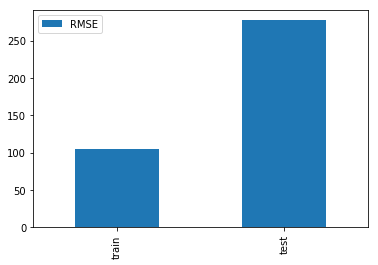

In [46]:
reg = RandomForestRegressor() 

fit_validate(reg, X_train, X_test, y_train, y_test)

Feature ranking:
1. feature bedrooms (0.214098)
2. feature number_of_reviews (0.125719)
3. feature latitude (0.104811)
4. feature longitude (0.092960)
5. feature cleaning_fee (0.081246)
6. feature zipcode (0.074691)
7. feature bathrooms (0.054792)
8. feature minimum_nights (0.054180)
9. feature accommodates (0.039659)
10. feature host_listings_count (0.037373)
11. feature beds (0.028465)
12. feature guests_included (0.016693)
13. feature property_type_Apartment (0.007714)
14. feature neighbourhood_Leblon (0.005836)
15. feature neighbourhood_Ipanema (0.004868)
16. feature host_identity_verified_t (0.004848)
17. feature host_identity_verified_f (0.004713)
18. feature neighbourhood_Barra da Tijuca (0.004178)
19. feature neighbourhood_Copacabana (0.003599)
20. feature property_type_House (0.003419)
21. feature neighbourhood_Jacarepaguá (0.003043)
22. feature property_type_Condominium (0.002923)
23. feature neighbourhood_Lagoa (0.002804)
24. feature neighbourhood_Botafogo (0.002139)
25. fea

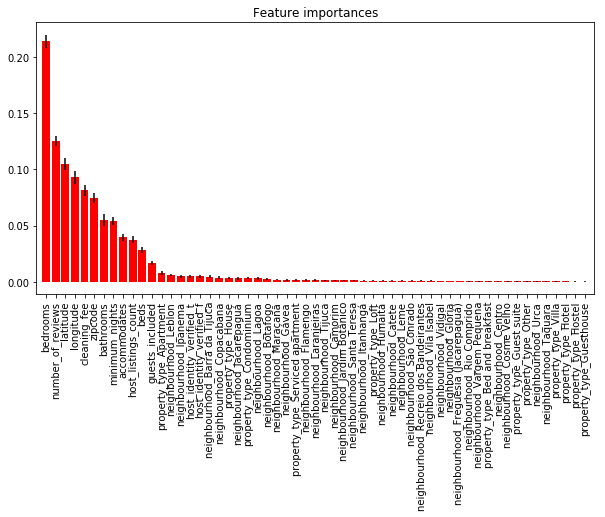

In [47]:
plt.rcParams['figure.figsize'] = [10, 5]
plot_feature_importances(reg, X_train, is_forest=True)

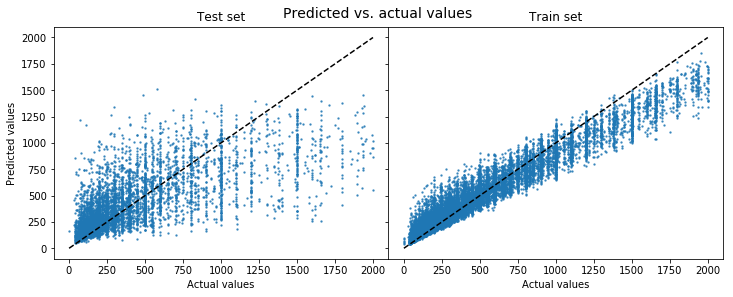

In [48]:
plot_predicted_vs_true_label(reg, X_train, X_test, y_train, y_test)

## Segundo round, após remoção de features irrelevantes

In [49]:
df_listings2 = df_listings2.drop(columns=['host_identity_verified','neighbourhood_cleansed','property_type'])
df_listings2.head()

,host_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,minimum_nights,number_of_reviews
0,2.0,22020050.0,-22.96592,-43.17896,5,1.0,2.0,2.0,188.0,250.0,2,7,251
1,0.0,22420010.0,-22.98467,-43.19611,6,2.0,2.0,4.0,442.0,277.0,6,5,94
2,3.0,22060020.0,-22.97712,-43.19045,2,1.0,1.0,2.0,160.0,250.0,2,7,238
3,1.0,22410003.0,-22.98302,-43.21427,3,1.0,1.0,1.0,359.0,111.0,2,2,282
4,1.0,22081020.0,-22.98816,-43.19359,2,1.5,1.0,1.0,495.0,225.0,2,2,181


In [50]:
X = df_listings2.drop(['price'],axis=1)
y = df_listings2['price']
X.shape, y.shape

((28375, 12), (28375,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25537, 12), (2838, 12), (25537,), (2838,))

MSE Train: 10804.96
MSE Test: 80002.50
RMSE Train: 103.95
RMSE Test: 282.85
R2 Train: 0.93
R2 Test: 0.48


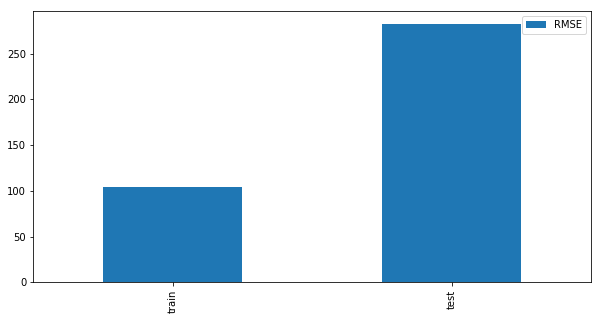

In [52]:
reg = RandomForestRegressor() 

fit_validate(reg, X_train, X_test, y_train, y_test)

Feature ranking:
1. feature bedrooms (0.216797)
2. feature number_of_reviews (0.127347)
3. feature latitude (0.121102)
4. feature longitude (0.112848)
5. feature zipcode (0.087425)
6. feature cleaning_fee (0.084523)
7. feature bathrooms (0.057382)
8. feature minimum_nights (0.057193)
9. feature accommodates (0.044037)
10. feature host_listings_count (0.041661)
11. feature beds (0.031439)
12. feature guests_included (0.018244)


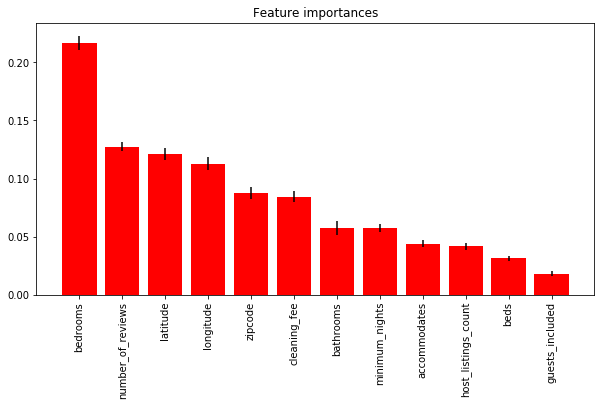

In [53]:
plt.rcParams['figure.figsize'] = [10, 5]
plot_feature_importances(reg, X_train, is_forest=True)

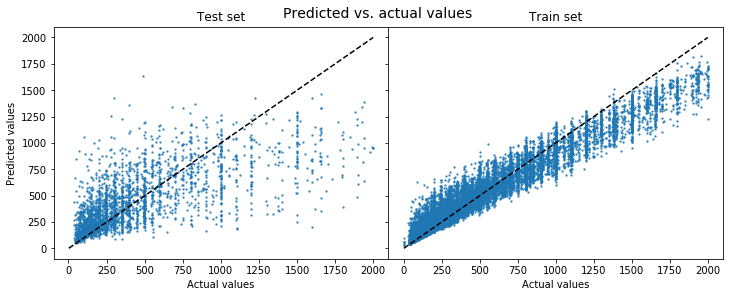

In [54]:
plot_predicted_vs_true_label(reg, X_train, X_test, y_train, y_test)

/home/chris/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:23:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE Train: 72951.78
MSE Test: 78998.07
RMSE Train: 270.10
RMSE Test: 281.07
R2 Train: 0.50
R2 Test: 0.49


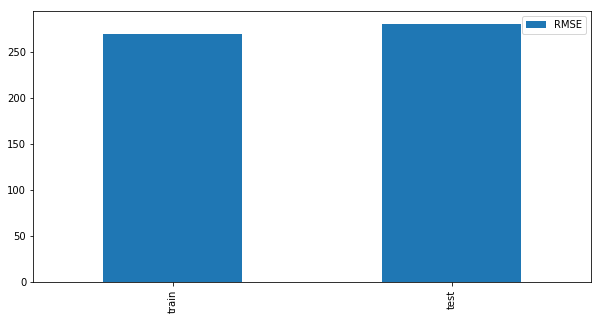

In [55]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()

fit_validate(xgb_reg, X_train, X_test, y_train, y_test)

Feature ranking:
1. feature bedrooms (0.432019)
2. feature number_of_reviews (0.159385)
3. feature bathrooms (0.130332)
4. feature cleaning_fee (0.058637)
5. feature accommodates (0.057844)
6. feature minimum_nights (0.045149)
7. feature guests_included (0.026640)
8. feature latitude (0.024256)
9. feature longitude (0.022288)
10. feature host_listings_count (0.020088)
11. feature zipcode (0.016485)
12. feature beds (0.006878)


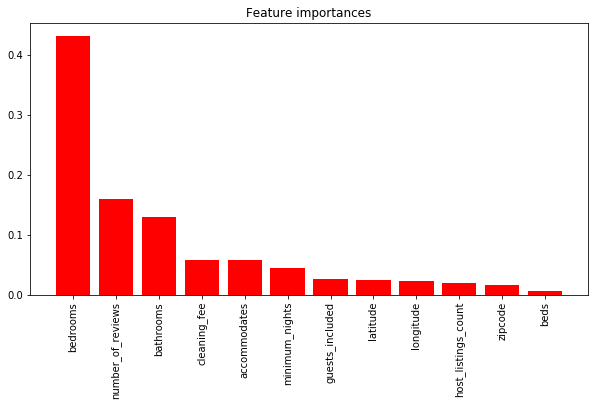

In [56]:
plot_feature_importances(xgb_reg, X_train, is_forest=False)

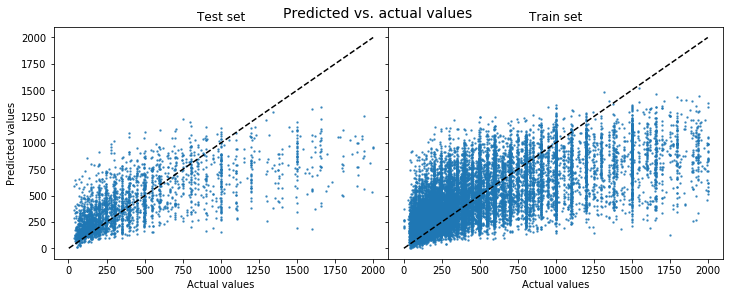

In [57]:
plot_predicted_vs_true_label(xgb_reg, X_train, X_test, y_train, y_test)